# Optimization

Let's consider the following code:

Text(0, 0.5, 'y')

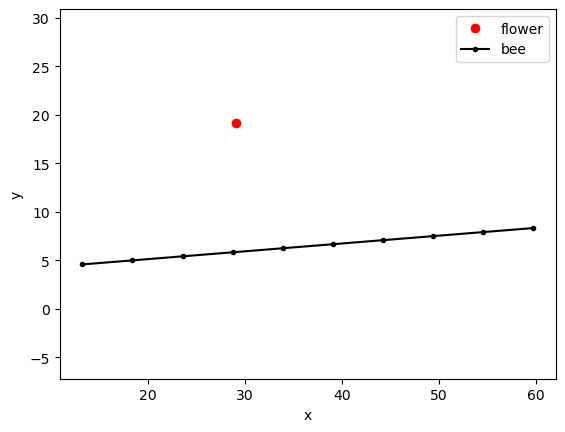

In [1]:
import numpy as np
import matplotlib.pyplot as plt

flower = np.array([29.1, 19.1])

def make_bee_track(t):
    """Find bee position at time t"""
    pos0 = (13.21, 4.56)
    velocity = (3.1, 0.25)
    pos_x = pos0[0] + t*velocity[0]
    pos_y = pos0[1] + t*velocity[1]
    return np.array([pos_x,pos_y])

t = np.linspace(0,15,10)
bee_track = make_bee_track(t)

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot( [flower[0]], [flower[1]], 'or', label='flower' )
ax.plot( bee_track[0], bee_track[1], '.-k', label='bee')
ax.axis('equal')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')


In the above code, we *parameterized* the bee trajectory by the variable `t` in the function `make_bee_track()`. This means we could get a new point on the track by choosing a new value of `t`. For example:

In [2]:
print(make_bee_track(0.0))
print(make_bee_track(0.1))
print(make_bee_track(0.2))
print(make_bee_track(1.0))

[13.21  4.56]
[13.52   4.585]
[13.83  4.61]
[16.31  4.81]


Now let's measure the distance between the bee and the flower.

array([21.5384238 , 17.73297556, 14.79017429, 13.29572112, 13.73095975,
       15.93858282, 19.32029244, 23.37188672, 27.80202491, 32.45606569])

Text(0, 0.5, 'distance')

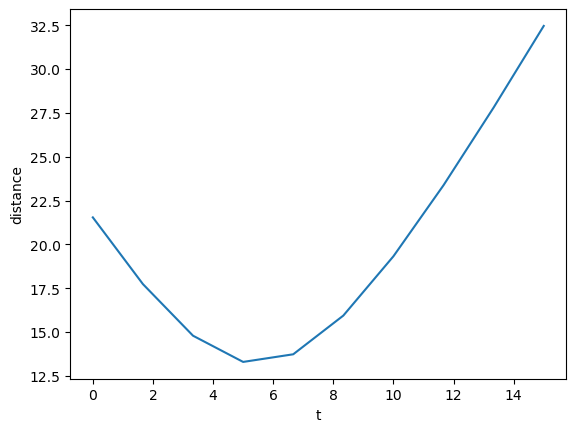

In [3]:
def compute_distance(a,b):
    a = np.array(a)
    b = np.array(b)
    return np.sqrt(np.sum((a-b)**2))

n_time_steps = bee_track.shape[1]
distance = np.zeros(n_time_steps)
for i in range(n_time_steps):
    bee_pos = bee_track[:,i]
    distance[i] = compute_distance(bee_pos, flower)
display(distance)

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot( t, distance )
ax.set_xlabel('t')
ax.set_ylabel('distance')

Given the plot of distance versus t above, we can see the distance is minimized when t is near 5. What is the bee's position when t is 5?

In [4]:
print(make_bee_track(5))

[28.71  5.81]


We can check back to the xy plot to see, indeed, this point is pretty close to the flower.

What if we want to know, however, exactly the closest point? There are several ways to find this. Here we are going to use a "brute force" approach which will work on many different problems. Specifically, we will use [scipy.optimize.minimize_scalar](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html). The overall idea of this kind of *numerical optimization* is that we find the best fitting parameter to minimize our "error".

In this example, we are not so much concerned with the exact algorithm being used, but with the way we call this algorithm.

We will make a class to do this:

In [5]:
class DistanceFinder:
    def __init__(self, flower):
        self.flower = flower
    def calc_distance(self, t):
        x1, y1 = self.flower
        x2, y2 = make_bee_track(t)
        dist = compute_distance((x1,y1), (x2,y2))
        print(f't: {t} -> dist: {dist}')
        return dist
    
distance_finder = DistanceFinder(flower)

In [6]:
distance_finder.calc_distance(0)

t: 0 -> dist: 21.538423804912004


21.538423804912004

In [7]:
distance_finder.calc_distance(5)

t: 5 -> dist: 13.295721116208782


13.295721116208782

In [8]:
import scipy.optimize
result = scipy.optimize.minimize_scalar(distance_finder.calc_distance)

t: 0.0 -> dist: 21.538423804912004
t: 1.0 -> dist: 19.17780487959975
t: 2.6180339999999998 -> dist: 15.913623755962107
t: 9.502603885705089 -> dist: 18.222622377854467
t: 2.6180339999999998 -> dist: 15.913623755962107
t: 5.24770562096323 -> dist: 13.233470063982764
t: 6.8729320915536185 -> dist: 13.918754747176704
t: 5.437736318938615 -> dist: 13.215989304828
t: 5.47123644934229 -> dist: 13.215645882055249
t: 5.468503780784455 -> dist: 13.215643128079853
t: 5.468493134264144 -> dist: 13.2156431280385
t: 5.468493215207842 -> dist: 13.215643128038504
t: 5.468493053320446 -> dist: 13.215643128038506


In [9]:
scipy.optimize.minimize_scalar?

Signature:
scipy.optimize.minimize_scalar(
    fun,
    bracket=None,
    bounds=None,
    args=(),
    method='brent',
    tol=None,
    options=None,
)
Docstring:
Minimization of scalar function of one variable.

Parameters
----------
fun : callable
    Objective function.
    Scalar function, must return a scalar.
bracket : sequence, optional
    For methods 'brent' and 'golden', `bracket` defines the bracketing
    interval and can either have three items ``(a, b, c)`` so that
    ``a < b < c`` and ``fun(b) < fun(a), fun(c)`` or two items ``a`` and
    ``c`` which are assumed to be a starting interval for a downhill
    bracket search (see `bracket`); it doesn't always mean that the
    obtained solution will satisfy ``a <= x <= c``.
bounds : sequence, optional
    For method 'bounded', `bounds` is mandatory and must have two items
    corresponding to the optimization bounds.
args : tuple, optional
    Extra arguments passed to the objective function.
method : str or callable, opt

In [10]:
result

     fun: 13.2156431280385
 message: '\nOptimization terminated successfully;\nThe returned value satisfies the termination criteria\n(using xtol = 1.48e-08 )'
    nfev: 13
     nit: 8
 success: True
       x: 5.468493134264144

In [11]:
type(result)

scipy.optimize._optimize.OptimizeResult

In [12]:
result.x

5.468493134264144

In [13]:
print(distance_finder.calc_distance(5))

t: 5 -> dist: 13.295721116208782
13.295721116208782


In [14]:
distance_finder.calc_distance(5.468493134264144)

t: 5.468493134264144 -> dist: 13.2156431280385


13.2156431280385

In [15]:
# Where is the bee for this value of `t`?
make_bee_track(5.468493134264144)

array([30.16232872,  5.92712328])